In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

missing_water = pd.read_csv("Missing Water 20220106_20220107 Report.csv")
missing_rg = pd.read_csv("Missing RG 20220106_20220107 Report.csv")
def plot_missing_data(missing_water,missing_rg):
    """Returns matplot fig and ax of the missing data plot"""
    missing_water.drop(columns=missing_water.columns[0], inplace=True)
    missing_rg.drop(columns=missing_rg.columns[0], inplace=True)

    missing_water['Timestamp'] = pd.to_datetime(missing_water['Timestamp'])
    missing_rg['Timestamp'] = pd.to_datetime(missing_rg['Timestamp'])

    water_min_val_month = missing_water['Timestamp'].min().month
    water_min_val_year = missing_water['Timestamp'].min().year
    water_max_val_month = missing_water['Timestamp'].max().month
    water_max_val_year = missing_water['Timestamp'].max().year

    rg_min_val_month = missing_rg['Timestamp'].min().month
    rg_min_val_year = missing_rg['Timestamp'].min().year
    rg_max_val_month = missing_rg['Timestamp'].max().month
    rg_max_val_year = missing_rg['Timestamp'].max().year

    min_val_month = pd.Series([water_min_val_month, rg_min_val_month]).min()
    min_val_year = pd.Series([water_min_val_year,rg_min_val_year]).min()
    max_val_month = pd.Series([water_max_val_month,rg_max_val_month]).max()
    max_val_year = pd.Series([water_max_val_year,rg_max_val_year]).max()

    min_datetime = pd.to_datetime(f"01/{min_val_month}/{min_val_year}", format=r"%d/%m/%Y")
    max_datetime = pd.to_datetime(f"01/{max_val_month+1}/{max_val_year}", format=r"%d/%m/%Y") - pd.Timedelta(days=1)

    date_range = pd.date_range(min_datetime,max_datetime,freq="1H")

    missing_water['Water Missing'] = 1
    missing_rg['RG Missing'] = 2

    complete_range_df = pd.DataFrame({'Timestamp':date_range})
    complete_range_df['Timestamp'] = pd.to_datetime(complete_range_df['Timestamp'])
    missing_df = pd.concat([complete_range_df,missing_water,missing_rg], keys="Timestamp")
    fig,ax = plt.subplots(figsize=[15,10])
    ax.scatter(missing_df['Timestamp'], missing_df['Water Missing'], color='blue', label=f"Missing Water: {missing_df['Water Missing'].count()} Missing Data")
    ax.scatter(missing_df['Timestamp'], missing_df['RG Missing'], color='green', label=f"Missing RG: {missing_df['RG Missing'].count()} Missing Data")
    ax.set_ylim((0,3))
    ax.set_yticks([])
    ax.legend()
    ax.set_xlabel("Timestamp")
    ax.set_title("Missing Data Entries")
    ax.grid(visible=True)
    return fig,ax

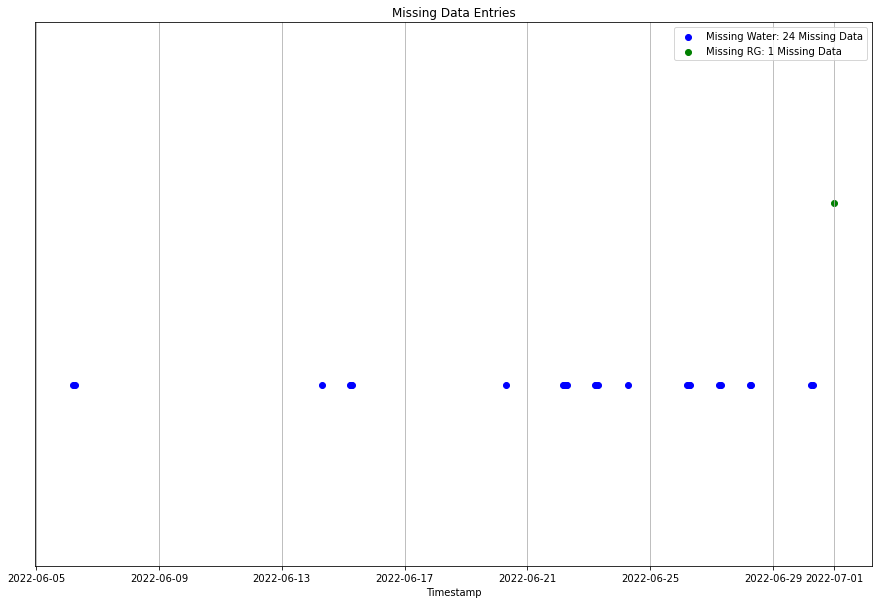

In [27]:
fig,ax = plot_missing_data(missing_water, missing_rg)